In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\hr157\Downloads\Walmart.csv')

In [14]:
# View structure
print("Rows:", len(df), "Columns:", list(df.columns))
print(df.head())

Rows: 6435 Columns: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [15]:
# 3. Total sales over time
total_sales = df['Weekly_Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")


Total Sales: $6,737,218,987.11


In [16]:
# Sales by Store
sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
top_stores = sales_by_store.sort_values(by='Weekly_Sales', ascending=False).head(5)
print("\nTop 5 Stores by Total Sales:")
print(top_stores)



Top 5 Stores by Total Sales:
    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08


In [17]:
# Sales trend over time
weekly_trend = df.groupby('Date')['Weekly_Sales'].sum().reset_index()


In [18]:
# Holiday vs Non-holiday sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
holiday_sales['Holiday'] = holiday_sales['Holiday_Flag'].map({0:'No', 1:'Yes'})
print("\nAverage Sales: Holiday vs Non-Holiday")
print(holiday_sales[['Holiday', 'Weekly_Sales']])



Average Sales: Holiday vs Non-Holiday
  Holiday  Weekly_Sales
0      No  1.041256e+06
1     Yes  1.122888e+06


In [19]:
# Save grouped results
sales_by_store.to_csv("sales_by_store.csv", index=False)
holiday_sales.to_csv("holiday_sales.csv", index=False)

C:\Users\hr157\AppData\Local\Temp\ipykernel_24696\3141292259.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stores, x='Store', y='Weekly_Sales', palette='viridis')


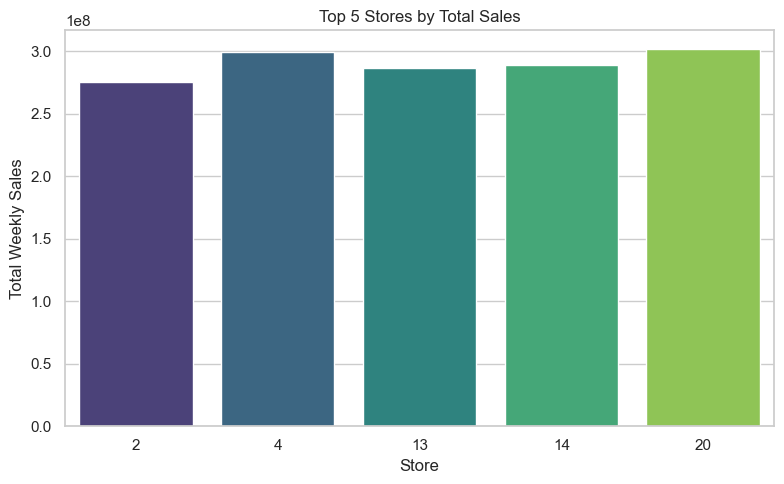

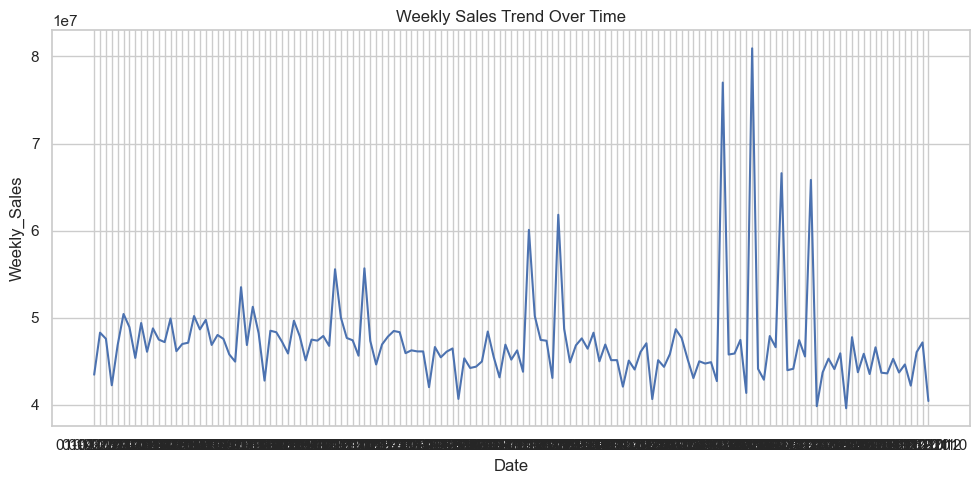

In [20]:
# Visualizations

sns.set(style="whitegrid")

# Top stores bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=top_stores, x='Store', y='Weekly_Sales', palette='viridis')
plt.title("Top 5 Stores by Total Sales")
plt.ylabel("Total Weekly Sales")
plt.tight_layout()
plt.savefig("top_stores.png")
plt.show()

# Sales trend line chart
plt.figure(figsize=(10,5))
sns.lineplot(data=weekly_trend, x='Date', y='Weekly_Sales')
plt.title("Weekly Sales Trend Over Time")
plt.tight_layout()
plt.savefig("weekly_sales_trend.png")
plt.show()

C:\Users\hr157\AppData\Local\Temp\ipykernel_24696\613309633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_sales, x='Holiday', y='Weekly_Sales', palette='coolwarm')


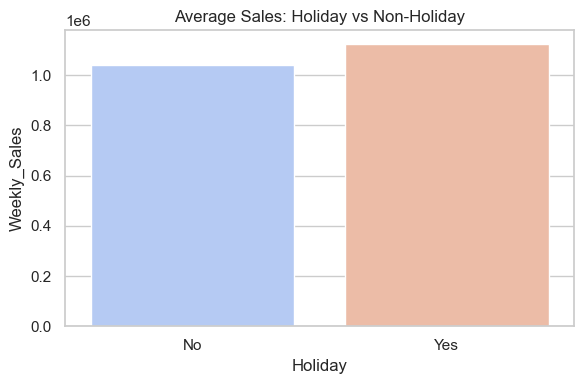

In [21]:
# Holiday vs Non-Holiday average sales
plt.figure(figsize=(6,4))
sns.barplot(data=holiday_sales, x='Holiday', y='Weekly_Sales', palette='coolwarm')
plt.title("Average Sales: Holiday vs Non-Holiday")
plt.tight_layout()
plt.savefig("holiday_vs_nonholiday.png")
plt.show()